20100149_ML_PA4

TASK 0

In [90]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

In [145]:
file = open('stop_words.txt', 'r')
stopwords = file.read().splitlines()
file.close()

test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
test_x = test['Tweet']
train_x = train['Tweet']
test_y = test['Sentiment']
train_y = train['Sentiment']
print(train_x,'\n\n', train_y,'\n\n', test_x,'\n\n', test_y)

0       @united to be clear on my luggage comment, I a...
1                          @united I wanna be grand staff
2       @united. DAY to IAD and CVG to IAD both Cancel...
3                                   @JetBlue Looking cool
4       @USAirways disappointment? Making own arrangem...
                              ...                        
5851    @VirginAmerica is the best airline I have flow...
5852    @americanair never fails to disappoint. waitin...
5853    That's not the case.. They sent me a email wit...
5854    @USAirways 1 hour and counting on hold :( why?...
5855    @united They let us know in advance of the reb...
Name: Tweet, Length: 5856, dtype: object 

 0        neutral
1       positive
2       negative
3       positive
4       negative
          ...   
5851    positive
5852    negative
5853     neutral
5854    negative
5855    positive
Name: Sentiment, Length: 5856, dtype: object 

 0       @USAirways thanks to the whole team for an on-...
1       @VirginAmerica gi

TASK 1

In [92]:
import re
from string import punctuation

def pre_process(text):
    
    text = ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)',' ',text).split())
    text = ' '.join([word for word in re.split('\W+',text) if word.lower() not in stopwords])
    text = re.sub(r'[0-9]+', '', text)
    text = text.lower()
    
    return text

In [146]:
for i in range (len(train_x)):
    train_x[i] = pre_process(train_x[i])
for i in range (len(test_x)):
    test_x[i] = pre_process(test_x[i])
print(train_x,'\n\n', test_x)

0       clear luggage comment referencing photo attach...
1                                       wanna grand staff
2       day iad cvg iad cancelled flightled united air...
3                                            looking cool
4       disappointment making arrangements amp sleepin...
                              ...                        
5851    best airline flown easy change reservation hel...
5852    never fails disappoint waiting jfk hour schedu...
5853                            case sent email link show
5854                                   hour counting hold
5855    let us know advance reboot yes thanks attentiv...
Name: Tweet, Length: 5856, dtype: object 

 0       thanks whole team time flight despite inclemen...
1       gives positive outlook sees increased competition
2       hey jetblue cancelled flightled flight st maar...
3       next thing know united believe dot take court ...
4       help made mistake dropped early bird check end...
                            

TASK 2

In [7]:
def tokenize(text):
    words = []
    for sentence in text:
        w = word_extraction(sentence)
        words.extend(w)
     
    words = sorted(list(set(words)))
    return words

def word_extraction(sentence):
    ignore = ['a', "the", "is"]
    words = re.sub("[^\w]", " ",  sentence).split()
    cleaned_text = [w.lower() for w in words if w not in ignore]
    return cleaned_text

def generate_bow(text1,text2):
    bow1 = []
    bow2 = []
    vocab = tokenize(text1)
    for tweet in text1:
        words = word_extraction(tweet)
        bag_vector = np.zeros(len(vocab))
        for w in words:
            for i,word in enumerate(vocab):
                if word == w: 
                    bag_vector[i] += 1
        bow1.append(bag_vector)
    for tweet in text2:
        words = word_extraction(tweet)
        bag_vector = np.zeros(len(vocab))
        for w in words:
            for i,word in enumerate(vocab):
                if word == w: 
                    bag_vector[i] += 1
        bow2.append(bag_vector)
    return np.array(bow1), np.array(bow2)

In [147]:
x_train = generate_bow(train_x,test_x)[0]
x_test = generate_bow(train_x,test_x)[1]

In [149]:
print(x_train,'\n\n', x_train.shape)
print('\n\n',x_test,'\n\n', x_test.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

 (5856, 7038)


 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 

 (1464, 7038)


TASK 3

In [64]:
def initial_parameter_guess(features):
    return((-0.3)*np.ones((1,1)),(-0.3)*np.ones((features.shape[1],1)))

def gradient_descent(alpha, tol, features, label, lam):
    
    theta0_i,theta_i = initial_parameter_guess(features)
    
    loss = []
    epochs = []
    i = 0
    
    while(True):
       
        H_theta_i = sigmoid(features, theta0_i, theta_i)
        Tem = H_theta_i - label
        
        loss_initial = cost_function(label, H_theta_i, theta_i, features, lam)
        
        Derivative_theta0 =deri_theta0(Tem, features)
        Derivative_theta =deri_theta(Tem, features, lam, theta_i)
        
        theta0_f = theta0_i - alpha * Derivative_theta0
        theta_f = theta_i - alpha * Derivative_theta
        
        H_theta_f = sigmoid(features, theta0_f, theta_f)
        
        loss_final = cost_function(label, H_theta_f, theta_f, features, lam)
        '''
        Was added only for plots.
        Otherwise My functions minimize loss to a certain degree i.e. 10^-4,
        and do not take in number of epochs as an input.
        
        if i > 1000:
            return(theta0_f, theta_f, epochs, loss)
            break
        '''
        if abs(loss_initial - loss_final) < tol:
            return(theta0_f, theta_f, epochs, loss)
            break
        if abs(loss_initial - loss_final) > tol:
            theta0_i = theta0_f
            theta_i = theta_f
    
        loss.append(loss_initial)
        epochs.append(i)
        i += 1

def sigmoid(features, theta0_i, theta_i):
    
    z = theta0_i + np.dot(features, theta_i)
    
    return(1/(1+ np.exp(-z)))


def deri_theta0(tem, features):
    
    return((np.sum(tem))/features.shape[0])


def deri_theta(tem, features, lam, theta_i):
    
    return(((np.matmul((features.T),tem)) / features.shape[0]) -
           ((lam / features.shape[0]) * theta_i))


def cost_function(label, H_theta_A, theta_A, features, lam):
    a=np.matmul((label.T),np.log(H_theta_A))
    b=np.matmul(((1-label).T),np.log(1-H_theta_A))
    c=(a+b)/features.shape[0]
    d=(lam*np.sum(np.square(theta_A)))/2*features.shape[0]
    return(-c+d)

In [11]:
y_train_1 = np.reshape(np.array(train_y.replace(['positive', 'negative', 'neutral'], [0, 1, 0])),(x_train.shape[0],1))
y_train_2 = np.reshape(np.array(train_y.replace(['positive', 'negative', 'neutral'], [0, 0, 1])),(x_train.shape[0],1))
y_train_3 = np.reshape(np.array(train_y.replace(['positive', 'negative', 'neutral'], [1, 0, 0])),(x_train.shape[0],1))

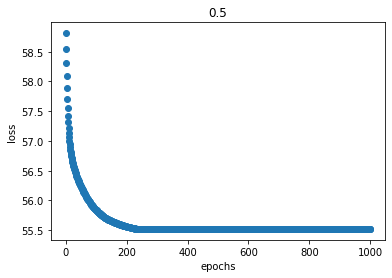

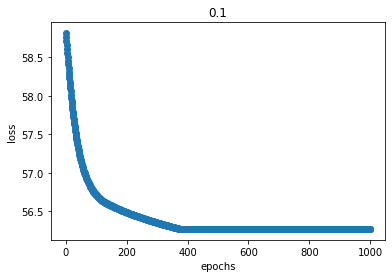

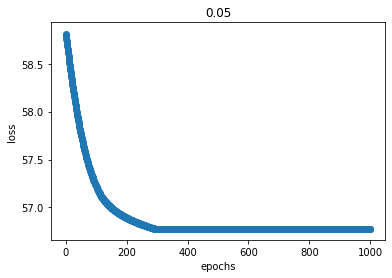

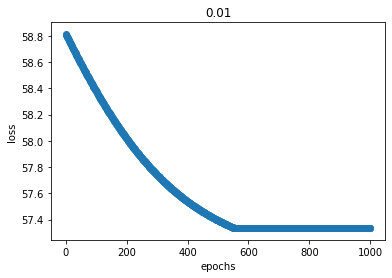

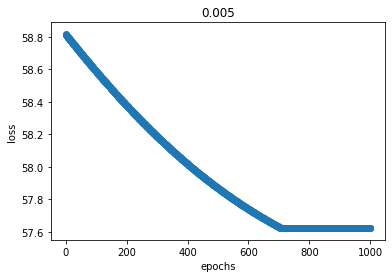

In [57]:
from itertools import zip_longest

def FindMaxLength(lst):
    maxList = max((x) for x in lst)
    maxLength = max(len(x) for x in lst )
  
    return maxList, maxLength

def combined_loss(loss_list):

    longest = FindMaxLength(loss_list)[1]
    
    loss_list[0].extend([(loss_list[0][len(loss_list[0])-1]) for i in range(longest-len(loss_list[0]))])
    loss_list[1].extend([(loss_list[1][len(loss_list[1])-1]) for i in range(longest-len(loss_list[1]))])
    loss_list[2].extend([(loss_list[2][len(loss_list[2])-1]) for i in range(longest-len(loss_list[2]))])
    
    return([sum(x) for x in zip(loss_list[0], loss_list[1], loss_list[2])])

alphas = [0.5, 0.1, 0.05, 0.01, 0.005]
loss_training = []

for alpha in alphas:
    theta0_final_1,theta_final_1,iterations_1,neg_log_like_loss_1=gradient_descent(alpha,0.001,x_train,y_train_1,0.00001)
    theta0_final_2,theta_final_2,iterations_2,neg_log_like_loss_2=gradient_descent(alpha,0.001,x_train,y_train_2,0.00001)
    theta0_final_3,theta_final_3,iterations_3,neg_log_like_loss_3=gradient_descent(alpha,0.001,x_train,y_train_3,0.00001)
    iterations_list = [iterations_1, iterations_2, iterations_3]
    loss_list = [neg_log_like_loss_1, neg_log_like_loss_2, neg_log_like_loss_3]
    iterations = FindMaxLength(iterations_list)[0]
    loss_of_3 = combined_loss(loss_list)
    loss_training.append(loss_of_3[len(loss_of_3)-1])
    plt.scatter(iterations,loss_of_3)
    plt.xlabel('epochs')
    plt.ylabel(('loss'))
    plt.title(alpha)
    plt.show()

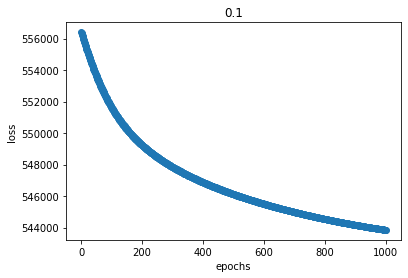

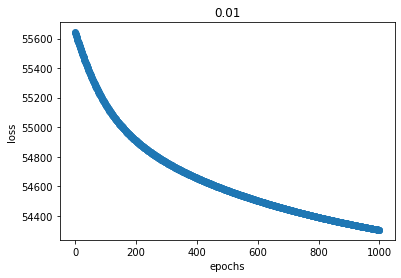

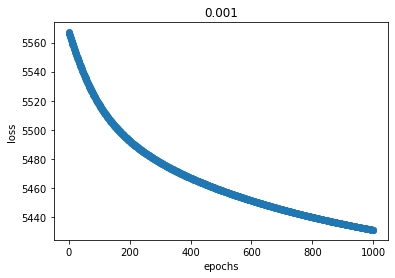

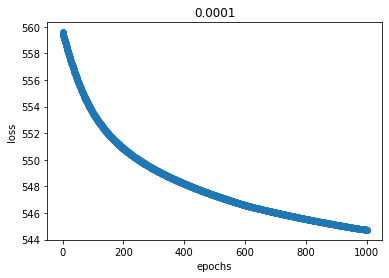

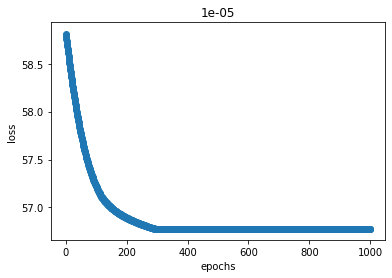

In [61]:
lams = [0.1, 0.01, 0.001, 0.0001, 0.00001]
loss_training = []

for lam in lams:
    theta0_final_1,theta_final_1,iterations_1,neg_log_like_loss_1=gradient_descent(0.05,0.001,x_train,y_train_1,lam)
    theta0_final_2,theta_final_2,iterations_2,neg_log_like_loss_2=gradient_descent(0.05,0.001,x_train,y_train_2,lam)
    theta0_final_3,theta_final_3,iterations_3,neg_log_like_loss_3=gradient_descent(0.05,0.001,x_train,y_train_3,lam)
    iterations_list = [iterations_1, iterations_2, iterations_3]
    loss_list = [neg_log_like_loss_1, neg_log_like_loss_2, neg_log_like_loss_3]
    iterations = FindMaxLength(iterations_list)[0]
    loss_of_3 = combined_loss(loss_list)
    loss_training.append(loss_of_3[len(loss_of_3)-1])
    plt.scatter(iterations,loss_of_3)
    plt.xlabel('epochs')
    plt.ylabel(('loss'))
    plt.title(lam)
    plt.show()

In [65]:
tuned_alpha = 0.05
tuned_lambda = 0.04

In [63]:
y_test_1 = np.reshape(np.array(test_y.replace(['positive', 'negative', 'neutral'], [0, 1, 0])),(x_test.shape[0],1))
y_test_2 = np.reshape(np.array(test_y.replace(['positive', 'negative', 'neutral'], [0, 0, 1])),(x_test.shape[0],1))
y_test_3 = np.reshape(np.array(test_y.replace(['positive', 'negative', 'neutral'], [1, 0, 0])),(x_test.shape[0],1))

In [67]:
theta0_final_1,theta_final_1,iterations_1,neg_log_like_loss_1=gradient_descent(tuned_alpha,0.001,x_train,y_train_1,tuned_lambda)
theta0_final_2,theta_final_2,iterations_2,neg_log_like_loss_2=gradient_descent(tuned_alpha,0.001,x_train,y_train_2,tuned_lambda)
theta0_final_3,theta_final_3,iterations_3,neg_log_like_loss_3=gradient_descent(tuned_alpha,0.001,x_train,y_train_3,tuned_lambda)

In [68]:
def prediction(y1, y2, y3):
    yp = []
    classes = ['negative', 'neutral', 'positive']
    for i in range(len(y1)):
        y_all = [y1[i], y2[i], y3[i]]
        y_high = (y_all.index(max(y_all)))
        y_pred = classes[y_high]
        yp.append(y_pred)
    return yp

In [69]:
y_pred_1 = sigmoid(x_test,theta0_final_1, theta_final_1)
y_pred_2 = sigmoid(x_test,theta0_final_2, theta_final_2)
y_pred_3 = sigmoid(x_test,theta0_final_3, theta_final_3)
yp = prediction(y_pred_1, y_pred_2, y_pred_3)
yp

['negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',


In [70]:
def evaluate_clf(ya,yp):
    accuracy = 0
    f1_score = 0
    classes = ['negative', 'neutral', 'positive']
    for c in range (len(classes)):
        tp = tn = fp = fn = 0
        for i in range(len(ya)):
            if ya[i] == yp[i] and ya[i] == classes[c]:
                tp += 1
            elif ya[i] == yp[i] and ya[i] != classes[c]:
                tn += 1
            elif yp[i] == classes[c] and ya[i] != classes[c]:
                fp += 1
            elif yp[i] != classes[c] and ya[i] == classes[c]:
                 fn += 1
        acc = (tp+tn) / (len(ya))
        precision = tp / (tp + fp )
        recall = tp / (tp + fn )
        f1score = 2 * (precision * recall) / (precision + recall)
        f1_score += f1score
        accuracy += acc
    macro_f1 = f1_score / 3
    accuracy_avg = accuracy / 3
    print('Accuracy score:', accuracy_avg)
    print('\nMacro F1 score:', macro_f1)
    ya = pd.Series(ya, name = 'Actual')
    yp = pd.Series(yp, name = 'Predicted')
    conf_matrix = pd.crosstab(ya, yp)
    print('\nConfusion Matrix:\n\n', conf_matrix)
evaluate_clf(test_y, yp)

Accuracy score: 0.6960382513661202

Macro F1 score: 0.487266185821089

Confusion Matrix:

 Predicted  negative  neutral  positive
Actual                                
negative        905        8        11
neutral         259       27        15
positive        139       13        87


TASK 4

In [75]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score
model = LogisticRegression(penalty='l2', solver='lbfgs')
ovr = OneVsRestClassifier(model)
ovr.fit(x_train, train_y)
yhat = ovr.predict(x_test)
print('Predictions for test data : \n\n', yhat)
print('\nAccuracy : ', accuracy_score(test_y,yhat))
print('\nMacro F1 score : ', f1_score(test_y,yhat, average = 'macro'))
print('\nConfusion Matrix : \n')
print(confusion_matrix(test_y,yhat))

Predictions for test data : 

 ['positive' 'negative' 'negative' ... 'neutral' 'neutral' 'neutral']

Accuracy :  0.7602459016393442

Macro F1 score :  0.6835872829829318

Confusion Matrix : 

[[812  87  25]
 [122 152  27]
 [ 46  44 149]]


TASK 5

In [278]:
train = pd.concat([x_train, train_y, train_x], axis=1)
train.sort_values(by = ['Sentiment'], inplace=True)

features = train['Tweet']
feature_count = train.iloc[:, 0:7038]
labels = train['Sentiment']

neg, neu, pos = labels.value_counts()
P_pos = pos / len(labels)
P_neg = neg / len(labels)
P_neu = neu / len(labels)

pos_t = train.iloc[neg+neu:neg+neu+pos, 7039:7040]
neu_t = train.iloc[neg:neg+neu, 7039:7040]
neg_t = train.iloc[0:neg, 7039:7040]

word_neg = train.iloc[0:neg, 0:7038].values.sum()
word_neu = train.iloc[neg:neg+neu, 0:7038].values.sum()
word_pos = train.iloc[neg+neu:neg+neu+pos, 0:7038].values.sum()

In [275]:
def NB_classifier(tweets):
    prob_class = []
    for i in range (len(tweets)):
        row = tweets[i]
        row = row.split()
        prob_class.append([likelihood(row, pos_t, word_pos, P_pos), 
                           likelihood(row, neg_t, word_neg, P_neg),
                           likelihood(row, neu_t, word_neu, P_neu)])
    return prob_class

def likelihood(tweet, label_freq, word_label_freq, prob_label):
        label = 0
        for i in range (len(tweet)):
            label += np.log(prior(tweet[i], label_freq, word_label_freq))
        label += (np.log(prob_label))
        return label

def prior(word, label_freq, word_label_freq):
    words = 0
    label_freq = np.array(label_freq)
    for i in range (len(label_freq)):
        words += label_freq[i][0].split().count(word) 
    p_word_label = (words + 1)/(word_label_freq + 7038)
    return p_word_label
probs_frame = NB_classifier(np.array(test_x))

In [276]:
classes = ['positive', 'negative', 'neutral']
def predict_nb(test_features):
    yp_nb = []
    for i in range (len(probs_frame)):
        max_prob = max(probs_frame[i])
        index = probs_frame[i].index(max_prob)
        yp_nb.append(classes[index])
    return yp_nb
yp_NB = predict_nb(pd.DataFrame(test_x))

['negative',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'neutral',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'nega

In [277]:
evaluate_clf(test_y, yp_NB)

Accuracy score: 0.7554644808743168

Macro F1 score: 0.6624929210075737

Confusion Matrix:

 Predicted  negative  neutral  positive
Actual                                
negative        834       62        28
neutral         140      125        36
positive         63       29       147


TASK 6

In [76]:
classifier = OneVsRestClassifier(MultinomialNB())
model_1 = classifier.fit(x_train, train_y)
yhat = model_1.predict(x_test)
print('Predictions for test data : \n\n', yhat)
print('\nAccuracy : ', accuracy_score(test_y,yhat))
print('\nMacro F1 score : ', f1_score(test_y,yhat, average = 'macro'))
print('\nConfusion Matrix : \n')
print(confusion_matrix(test_y,yhat))

Predictions for test data : 

 ['negative' 'negative' 'negative' ... 'neutral' 'negative' 'negative']

Accuracy :  0.7595628415300546

Macro F1 score :  0.6538162152169296

Confusion Matrix : 

[[865  43  16]
 [167 104  30]
 [ 71  25 143]]


In [ ]:
'''
Logistic Regression                              Naiive Bayes

Accuracy       :  0.7602459016393442             Accuracy       :  0.7595628415300546
Macro F1 score :  0.6835872829829318             Macro F1 score :  0.6538162152169296

Based on evaluation results of part 4 and part 6, for the same test data set,
The performance of Logistic Regression multi-class OVR classifier is better than Naiive Bayes multiclass OVR classifier
for Tweet's sentiment analysis

The enhanced performance of Logistic regression classifier can be explained by the underlying assumption of
Naiive Bayes classifier's working, i.e. independence of words in a tweet which is not necessarily true for the 
given data sets i.e. training and testing Tweets
'''